# Experiment 1:

# Labelling The Unlabelled Data

In [33]:
# Importing the General purpose libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Scikit-learn modules for preprocessing and model selection.
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.model_selection import train_test_split

# Importing the Scikit-learn classifiers.
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# Importing the Scikit-learn metrics and pipeline.
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.pipeline import Pipeline

# Importing Extra scikit-learn tools
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import SVC


# Importing the TensorFlow/Keras for deep learning
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras import regularizers
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras import utils as np_utils

# Importing dictionary and counter from python Library.
from collections import defaultdict, Counter


In [22]:
# Reading the original file.
df=pd.read_csv("682200107170331.csv")
# Reading the zero filled value file.
df_zero= pd.read_csv("682200107170331_fill_zero.csv")
# Reading the Knn neighbour 2 imputed value file.
df_knn2= pd.read_csv("682200107170331_fill_knn_2.csv")
# Reading the Knn neighbour 3 imputed value file.
df_knn3= pd.read_csv("682200107170331_fill_knn_3.csv")

# Displaying the first five samples.
df_knn2.head()

,FPAC,BLAC,CTAC,TH,MH,EGT_1,EGT_2,EGT_3,EGT_4,IVV,...,DWPT,OIPL,EHRS_4,EHRS_3,EHRS_2,TMODE,ATEN,LATP,FGC3,ILSF
0,0.0,-0.011724,0.0,85.690800,98.522450,19.0,21.5,16.0,15.0,6.0,...,32832.0,0.0,8902.0,8498.0,7702.0,2.0,0.0,40.688553,120.0,1109093.0
1,0.0,-0.014655,0.0,86.014890,98.846535,19.0,21.5,16.0,15.0,6.0,...,32832.0,0.0,8902.0,8498.0,7702.0,2.0,0.0,40.688553,120.0,1109093.0
2,0.0,-0.019540,0.0,86.289540,99.121185,19.0,21.5,16.0,15.0,5.0,...,32832.0,0.0,8902.0,8498.0,7702.0,2.0,0.0,40.688553,120.0,1109093.0
3,0.0,-0.022471,0.0,86.580666,99.412315,19.0,21.5,16.0,15.0,3.0,...,32832.0,0.0,8902.0,8498.0,7702.0,2.0,0.0,40.688553,120.0,1109093.0
4,0.0,-0.023448,0.0,86.904755,99.736404,19.0,21.5,16.0,15.0,2.0,...,32832.0,0.0,8902.0,8498.0,7702.0,2.0,0.0,40.688553,120.0,1109093.0


In [23]:
# Selecting features - excluding 'FRMC' for model training.
# Defining the feature that are not contributing in the anomaly detection.
exclude_columns = ['FRMC', 'DATE_YEAR', 'DATE_MONTH', 'DATE_DAY']
# Collecting all the feature names except excluded columns.
features = [col for col in df_knn2.columns if col not in exclude_columns]
# Printing the final features
print(features)

['FPAC', 'BLAC', 'CTAC', 'TH', 'MH', 'EGT_1', 'EGT_2', 'EGT_3', 'EGT_4', 'IVV', 'GS', 'TRK', 'TRKM', 'DA', 'WS', 'MW', 'DFGS', 'WD', 'ALT', 'NSQT', 'RALT', 'ALTR', 'FQTY_1', 'OIT_1', 'OIT_2', 'AOA1', 'AOA2', 'PTCH', 'FF_1', 'PSA', 'FF_2', 'FF_3', 'ROLL', 'FF_4', 'N1_1', 'N1_2', 'MACH', 'CAS', 'APFD', 'PH', 'CASM', 'TAS', 'VRTG', 'LATG', 'PI', 'PS', 'N1_3', 'EVNT', 'MRK', 'VIB_1', 'PT', 'VHF1', 'VHF2', 'LGDN', 'LGUP', 'VIB_2', 'VHF3', 'PUSH', 'SHKR', 'MSQT_2', 'VIB_3', 'LONG', 'PLA_1', 'N1_4', 'HYDY', 'HYDG', 'VIB_4', 'PLA_2', 'PLA_3', 'PLA_4', 'GMT_HOUR', 'GMT_MINUTE', 'GMT_SEC', 'ACMT', 'FQTY_2', 'OIT_3', 'OIT_4', 'BLV', 'EAI', 'PACK', 'AOAI', 'AOAC', 'BAL1', 'BAL2', 'WOW', 'N2_1', 'N2_2', 'N2_3', 'N2_4', 'TAT', 'SAT', 'N1T', 'N1C', 'OIP_1', 'OIP_2', 'FQTY_4', 'CRSS', 'HDGS', 'ALTS', 'CASS', 'N1CO', 'VSPS', 'MNS', 'MSQT_1', 'VMODE', 'LMOD', 'A_T', 'OIP_3', 'OIP_4', 'LOC', 'GLS', 'LONP', 'ABRK', 'ECYC_1', 'ECYC_2', 'FLAP', 'SPLY', 'SPLG', 'BPGR_2', 'BPYR_1', 'ECYC_3', 'ECYC_4', 'EHRS_1

## 1. Anomaly Detection (Label Generation) Using iForest Model

In [24]:
# Defining the isolation forest method which take data and threshold values which is 9% here.
def apply_isolation_forest(df, threshold_factor=0.09):
    # Exclding the columns from the features that are not contributing for the anomaly detection.
    excluded_columns = ['FRMC', 'DATE_YEAR', 'DATE_MONTH', 'DATE_DAY']
    # Getting all the features except the excluded onces.
    features = [col for col in df.columns if col not in excluded_columns]
    # Defining the isolation forest model with 100 estimators and keeping the contamination rate to 0.01.
    model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
    # fitting the data into model.
    model.fit(df[features])
    
    # Calculating the Anomaly scores.
    anomaly_scores = model.decision_function(df[features])
    
    # Choosing a threshold for classifying anomalies based on the provided threshold factor.
    threshold = np.percentile(anomaly_scores, threshold_factor * 100)
    
    # Labelling instances as normal (1) or anomalous (-1) based on the threshold.
    labels = np.where(anomaly_scores < threshold, -1, 1)
    
    # Creating a column named labels and passing the labels into it.
    df['labels'] = labels
    # Mapping 1 for Anomaly and 0 for Normal.
    df['labels'] = df['labels'].apply(lambda x: 1 if x == -1 else 0)
    # Storing the Anomaly Score into anomaly_scores column.
    df['anomaly_scores'] = anomaly_scores
    return df

In [25]:
# Identifying Anomaly using Isolation Forest for both knn2 and knn3 file.
df_knn2 = apply_isolation_forest(df_knn2)
df_knn3= apply_isolation_forest(df_knn3)
df_knn2.head()

,FPAC,BLAC,CTAC,TH,MH,EGT_1,EGT_2,EGT_3,EGT_4,IVV,...,EHRS_4,EHRS_3,EHRS_2,TMODE,ATEN,LATP,FGC3,ILSF,labels,anomaly_scores
0,0.0,-0.011724,0.0,85.690800,98.522450,19.0,21.5,16.0,15.0,6.0,...,8902.0,8498.0,7702.0,2.0,0.0,40.688553,120.0,1109093.0,1,0.005398
1,0.0,-0.014655,0.0,86.014890,98.846535,19.0,21.5,16.0,15.0,6.0,...,8902.0,8498.0,7702.0,2.0,0.0,40.688553,120.0,1109093.0,1,0.012892
2,0.0,-0.019540,0.0,86.289540,99.121185,19.0,21.5,16.0,15.0,5.0,...,8902.0,8498.0,7702.0,2.0,0.0,40.688553,120.0,1109093.0,1,0.010634
3,0.0,-0.022471,0.0,86.580666,99.412315,19.0,21.5,16.0,15.0,3.0,...,8902.0,8498.0,7702.0,2.0,0.0,40.688553,120.0,1109093.0,1,0.007831
4,0.0,-0.023448,0.0,86.904755,99.736404,19.0,21.5,16.0,15.0,2.0,...,8902.0,8498.0,7702.0,2.0,0.0,40.688553,120.0,1109093.0,1,0.005594


## 2. Anamoly Detection (Label Generation) Using Autoencoder

In [26]:
# Defining the autoencoder function.
def detect_anomalies_autoencoder(df):
    # Preprocess data: scale features, exclude non-feature columns
    excluded_columns = ['FRMC', 'DATE_YEAR', 'DATE_MONTH', 'DATE_DAY', 'labels']
    features = [col for col in df.columns if col not in excluded_columns]
    # Assigning the features
    df_features = df[features]
    scaler = StandardScaler()
    # performing the scaling operaiton on the feature values.
    df_scaled = scaler.fit_transform(df_features.values)

    # Splitting the data for testing and training which is 80% and 20% respectively.
    X_train, X_test = train_test_split(df_scaled, test_size=0.2, random_state=42)

    # Defining the autoencoder model.
    input_dim = X_train.shape[1]
    input_layer = Input(shape=(input_dim,))

    # Encoding the data using relu function.
    encoded = Dense(64, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_layer)
    encoded = Dense(32, activation='relu')(encoded)
    encoded = Dense(16, activation='relu')(encoded)

    # Decoding the data using relu function where using linear activation function.
    decoded = Dense(16, activation='relu')(encoded)
    decoded = Dense(32, activation='relu')(decoded)
    decoded = Dense(64, activation='relu')(decoded)
    decoded = Dense(input_dim, activation='linear')(decoded)

    # Making the autoencoder by defining the layers into it.
    autoencoder = Model(inputs=input_layer, outputs=decoded)

    # Compiling the model using adam optimizer and for loss function using mean squared error for the model
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')

    # Training the model (Having 100 episoders with having batch size of 100)
    autoencoder.fit(X_train, X_train,
                    epochs=100,
                    batch_size=256,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=0)

    # Predicting on the full data
    predictions = autoencoder.predict(df_scaled)

    # Computing the reconstruction error
    mse = np.mean(np.power(df_scaled - predictions, 2), axis=1)

    # Determining a threshold for anomaly
    threshold = np.quantile(mse, 0.95)  

    # Creating the 'labels_2' column, where 1 indicates an anomaly and 0 indicates normal
    df['labels_2'] = [1 if e > threshold else 0 for e in mse]

    # Comparing the labels generated by both the models.
    matches = (df['labels'] == df['labels_2'])

    # Counting the matching rows and mismatched rows.
    matching_rows = matches.sum()
    mismatching_rows = len(df) - matching_rows

    # Filtering the rows where labels are matching
    matching_df = df[matches]
    # Returns only rows where both the model detects anamoly
    return matching_df.drop(columns=['labels_2']), matching_rows, mismatching_rows

# Detecting Anamoly Using Autoencoder
df_knn2, matches_knn2, mismatches_knn2 = detect_anomalies_autoencoder(df_knn2)

df_knn3, matches_knn3, mismatches_knn3 = detect_anomalies_autoencoder(df_knn3)

6708/6708 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step
6708/6708 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


In [20]:
# Printing the matching and mistmatchin rows for the df_knn2
print(f'For df_knn2:')
print(f"Number of matching rows: {matches_knn2}")
print(f"Number of mismatching rows: {mismatches_knn2}")
print(f"Proportion of accurate labeling:{matches_knn2/(matches_knn2+mismatches_knn2)*100:.2f}%")

# Printing the matching and mistmatching rows for the df_knn3
print(f'\nFor df_knn3:')
print(f"Number of matching rows: {matches_knn3}")
print(f"Number of mismatching rows: {mismatches_knn3}")
print(f"Proportion of accurate labeling:{matches_knn3/(matches_knn3+mismatches_knn3)*100:.2f}%")

For df_knn2:
Number of matching rows: 192156
Number of mismatching rows: 22500
Proportion of accurate labeling:89.52%

For df_knn3:
Number of matching rows: 191228
Number of mismatching rows: 23428
Proportion of accurate labeling:89.09%


## Visualize Normal Vs Anamoly for Selected Features.
The visualization is done on the few critical features that are commonly monitored in aviation for safety and performance:
   - Engine Gas Temperature (EGT) - represented here as EGT_1, EGT_2, EGT_3, and EGT_4 for multiple engines.
   - Mach Number (MH) - indicating the aircraft's speed relative to the speed of sound.
   - Total Air Temperature (TAT) - labeled as TH here, which affects engine performance and efficiency.

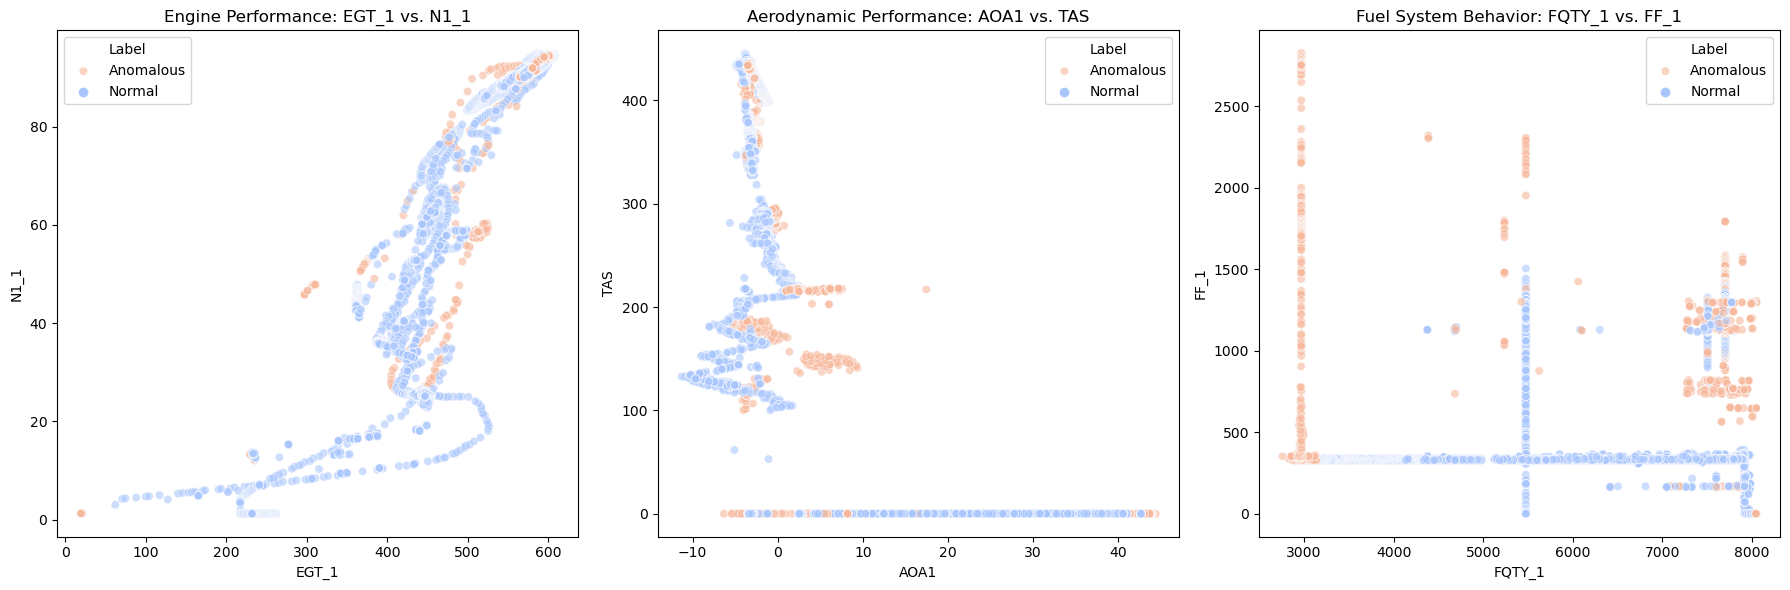

In [27]:
# Scatter Plot of Engine Performance, aerodynamic performance,fuel system behavior on df_knn2
    #     EGT_1 vs. N1_1 to understand engine performance.
    #    AOA1 vs. TAS for aerodynamic performance.
    #    FQTY_1 vs. FF_1 for insights into fuel system behavior.

# Visualization setup for the selected feature pairs
feature_pairs = [('EGT_1', 'N1_1'), ('AOA1', 'TAS'), ('FQTY_1', 'FF_1')]
# Defining the titles for the graphs
titles = ['Engine Performance: EGT_1 vs. N1_1', 
          'Aerodynamic Performance: AOA1 vs. TAS', 
          'Fuel System Behavior: FQTY_1 vs. FF_1']

# Setting up the matplotlib figure.
plt.figure(figsize=(18, 6))

# Iterating the data for graphs.
for i, (x, y) in enumerate(feature_pairs, 1):
    # Generating 3 subplots.
    plt.subplot(1, 3, i)
    # Printing the graph for the knn 2 file.
    sns.scatterplot(data=df_knn2, x=x, y=y, hue='labels', palette='coolwarm', alpha=0.6)
    # Plotting the graph with the lable and title.
    plt.title(titles[i-1])
    plt.xlabel(x)
    plt.ylabel(y)
    # Defining the legend.
    plt.legend(title='Label', labels=['Anomalous', 'Normal'])

# Plotting the three subplots.
plt.tight_layout()
plt.show()

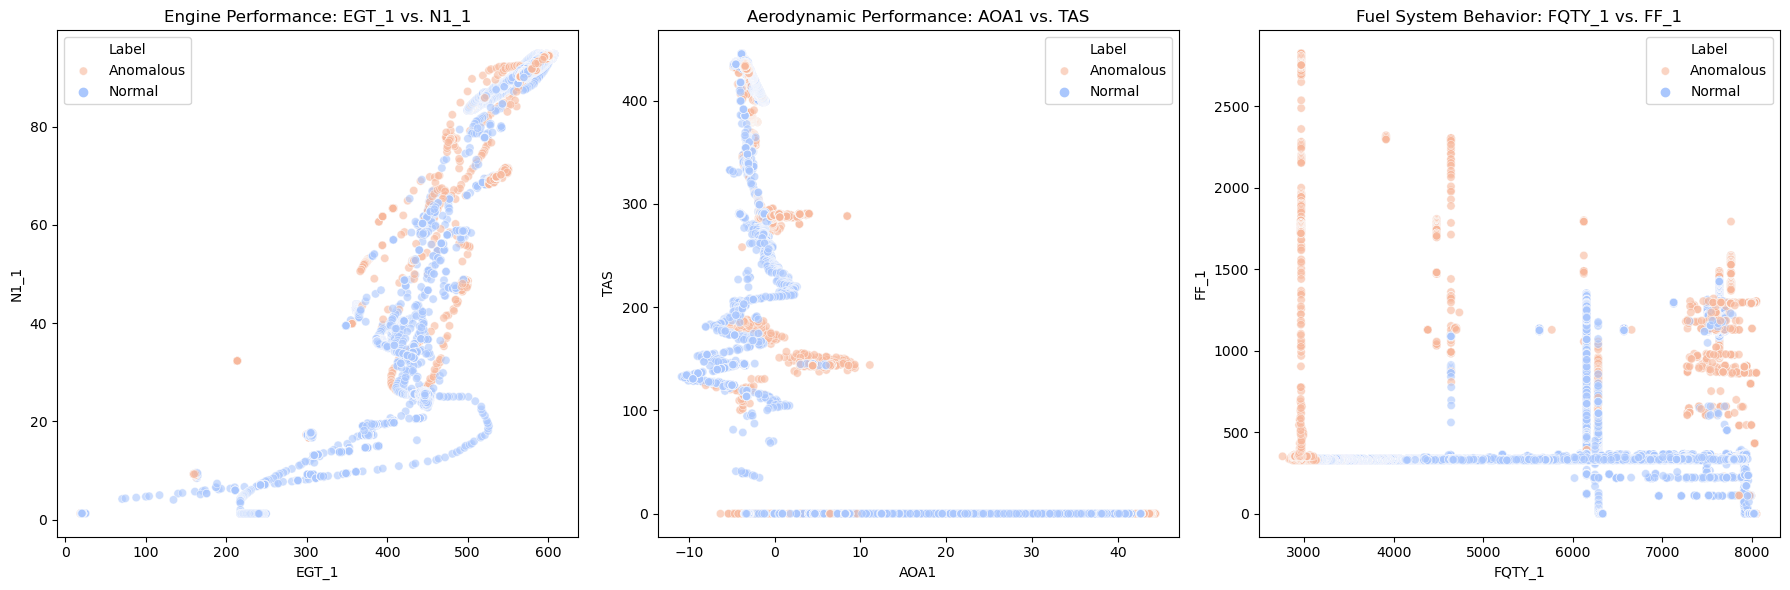

In [28]:
# Scatter Plot of Engine Performance, aerodynamic performance,fuel system behavior on df_knn3
    #     EGT_1 vs. N1_1 to understand engine performance.
    #    AOA1 vs. TAS for aerodynamic performance.
    #    FQTY_1 vs. FF_1 for insights into fuel system behavior.

# Setting up the matplotlib figure.
plt.figure(figsize=(18, 6))

# Iterating throgh loop
for i, (x, y) in enumerate(feature_pairs, 1):
    # Generating 3 subplots.
    plt.subplot(1, 3, i)
    sns.scatterplot(data=df_knn3, x=x, y=y, hue='labels', palette='coolwarm', alpha=0.6)
    plt.title(titles[i-1])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend(title='Label', labels=['Anomalous', 'Normal'])
# Displaying the layout
plt.tight_layout()
plt.show()

# 3. Supervised Learning - Classification of Labels (Confidence Checking)


In the below defined method (Process_and_evaluate_models), we are performing the validation of the labels using three models which are Logistic Regression, SVM (Support Vector Machines), Neural Network (MLP Classifier). Using 80% data for training and 20% Data for Testing.

In [34]:
def process_and_evaluate_models(df, target_column, test_size=0.2, random_state=42):
    # Define features excluding the target column and other non-feature columns.
    excluded_columns = ['FRMC', 'DATE_YEAR', 'DATE_MONTH', 'DATE_DAY', target_column]
    features = [col for col in df.columns if col not in excluded_columns]

    # Preprocessing the data: scalling the data
    scaler = StandardScaler()
    X = scaler.fit_transform(df[features])
    y = df[target_column]

    # Splitting the data into training and testing datasets 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Defining the number of models to be evaluated
    models = {
        # For logistic Regression we are using 10000 maximum iteration.
        "Logistic Regression": LogisticRegression(max_iter=10000),
        # Using inbuilt SVM model
        "Support Vector Machine": SVC(probability=True),
        # For Neural Network we are using MLP (Multilayer Preceptron Classifier) Classifier.
        "Neural Network": MLPClassifier(max_iter=1000)
    }

    # Evaluating each model
    evaluation_results = {}
    # Iterating through each model.
    for name, model in models.items():
        # fitting the data into model
        model.fit(X_train, y_train)
        # Getting the predictions from the model
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
        # Getting accuracy from the model
        accuracy = accuracy_score(y_test, y_pred)
        # Getting the details for the AUC score
        auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"
        # Getting the confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        
        # Defining the structure for evaluation for the models
        evaluation_results[name] = {
            "Classification Report": pd.DataFrame(report).transpose(),
            "Confusion Matrix": conf_matrix,
            "AUC": auc,
            "Accuracy": accuracy
        }

    # Displaying the results for the models.
    for model_name, results in evaluation_results.items():
        print(f"Model: {model_name}")
        print(f"Accuracy: {results['Accuracy']:.4f}, AUC: {results['AUC']}")
        print("Confusion Matrix:")
        print(results['Confusion Matrix'])
        print("Classification Report:")
        print(results['Classification Report'])
        print("\n" + "-"*60 + "\n")


###    1. Complete Data Based Analysis

In [35]:
# Performing the Operation for df_knn2
process_and_evaluate_models(df_knn2, 'labels')

Model: Logistic Regression
Accuracy: 0.9996, AUC: 0.9999863765766756
Confusion Matrix:
[[37632     3]
 [   11   736]]
Classification Report:
              precision    recall  f1-score       support
0              0.999708  0.999920  0.999814  37635.000000
1              0.995940  0.985274  0.990579    747.000000
accuracy       0.999635  0.999635  0.999635      0.999635
macro avg      0.997824  0.992597  0.995196  38382.000000
weighted avg   0.999634  0.999635  0.999634  38382.000000

------------------------------------------------------------

Model: Support Vector Machine
Accuracy: 0.9994, AUC: 0.9998751126911437
Confusion Matrix:
[[37628     7]
 [   15   732]]
Classification Report:
              precision    recall  f1-score       support
0              0.999602  0.999814  0.999708  37635.000000
1              0.990528  0.979920  0.985195    747.000000
accuracy       0.999427  0.999427  0.999427      0.999427
macro avg      0.995065  0.989867  0.992451  38382.000000
weighted avg  

In [36]:
# Performing the operation for the df_knn3
process_and_evaluate_models(df_knn3, 'labels')

Model: Logistic Regression
Accuracy: 0.9997, AUC: 0.9999895192155674
Confusion Matrix:
[[37619     0]
 [   12   617]]
Classification Report:
              precision    recall  f1-score       support
0              0.999681  1.000000  0.999841  37619.000000
1              1.000000  0.980922  0.990369    629.000000
accuracy       0.999686  0.999686  0.999686      0.999686
macro avg      0.999841  0.990461  0.995105  38248.000000
weighted avg   0.999686  0.999686  0.999685  38248.000000

------------------------------------------------------------

Model: Support Vector Machine
Accuracy: 0.9995, AUC: 0.9999975065875745
Confusion Matrix:
[[37618     1]
 [   18   611]]
Classification Report:
              precision    recall  f1-score       support
0              0.999522  0.999973  0.999748  37619.000000
1              0.998366  0.971383  0.984690    629.000000
accuracy       0.999503  0.999503  0.999503      0.999503
macro avg      0.998944  0.985678  0.992219  38248.000000
weighted avg  

# 4. Extra models for Evaluation (LSTM, LOF)

In [37]:
# Defining the method with the same feature as mentioned above.
def process_and_evaluate_models_(df, target_column, test_size=0.2, random_state=42, lstm=False):
    # Defining features excluding the target column and non-feature columns
    excluded_columns = ['FRMC', 'DATE_YEAR', 'DATE_MONTH', 'DATE_DAY', target_column]
    features = [col for col in df.columns if col not in excluded_columns]

    # performing scalling operation on features
    scaler = StandardScaler()
    X = scaler.fit_transform(df[features])
    y = df[target_column]

    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Defining the models that are being used.
    models = {
        # Using DBSCAN (Density-Based Spatial Clustering of Applications with Noise) model
        "DBSCAN": DBSCAN(),
        # Using local outlier factor model with 20 neighbours
        "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20)
    }
    # performing the operations for the LSTM model
    if lstm:
        # For LSTM Model - Assuming binary classification out project.
        y_train_enc = np_utils.to_categorical(y_train)
        y_test_enc = np_utils.to_categorical(y_test)
        
        # Reshaping the input to be [samples, time steps, features]
        X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
        X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
    
        # Defining the LSTM model layers
        lstm_model = Sequential()
        lstm_model.add(LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
        # Keeping the dropout rate of 50%
        lstm_model.add(Dropout(0.5))
        # Using softmax function as the activation function for the moel.
        lstm_model.add(Dense(2, activation='softmax'))
        lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        # Assigning the defined model
        models["LSTM"] = lstm_model

    # Evaluating the models
    evaluation_results = {}
    # Iterating through models
    for name, model in models.items():
        # printing the for DBSCAN and LOF.
        if name in ["DBSCAN", "Local Outlier Factor"]:
            # If the model if DBSCAN then it will perform the operation.
            if name == "DBSCAN":
                model.fit(X)
                labels = model.labels_
            else:
                model.fit(X)
                labels = model.fit_predict(X)
            
            # Converting the Labels to binary (0: normal, 1: anomaly)
            labels = [1 if x == -1 else 0 for x in labels]
            accuracy = accuracy_score(y, labels)
            evaluation_results[name] = {"Accuracy": accuracy}
            # if the model is LSTM then  performing the operation for the LSTM.
        elif name == "LSTM":
            # fitting the data into model
            model.fit(X_train_lstm, y_train_enc, epochs=10, batch_size=64, validation_data=(X_test_lstm, y_test_enc), verbose=2)
            _, accuracy = model.evaluate(X_test_lstm, y_test_enc, verbose=0)
            evaluation_results[name] = {"Accuracy": accuracy}

    # Printing the results
    for model_name, results in evaluation_results.items():
        print(f"Model: {model_name}, Accuracy: {results.get('Accuracy', 'N/A')}")
        if model_name == "LSTM":
            print(f"LSTM Test Accuracy: {results['Accuracy']:.4f}")


In [38]:
# Performing the evaluation for Knn3 for DBSCAN, LOF and LSTM model 
process_and_evaluate_models_(df_knn3, 'labels')

Model: DBSCAN, Accuracy: 0.8806657742266101
Model: Local Outlier Factor, Accuracy: 0.8808278775962685
